In [2]:
import PIG
import numpy as np
import matplotlib.pyplot as plt
import argparse

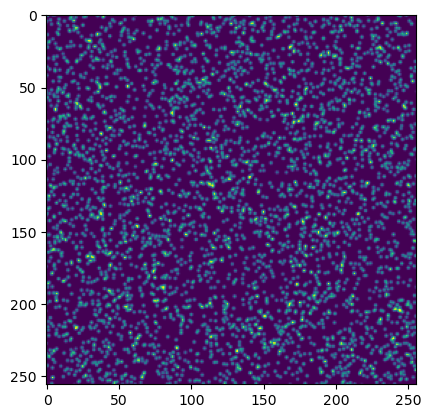

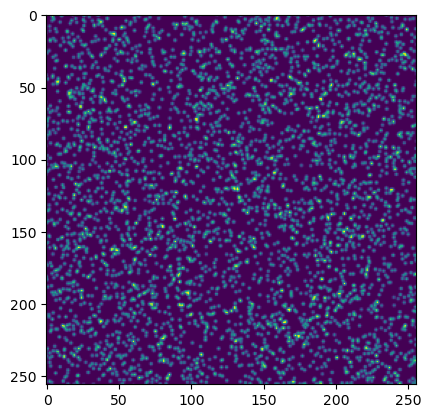

In [3]:
parser = argparse.ArgumentParser()

# styles = ['lamb_oseen', 'sin_flow']
# styles = ['lamb_oseen']
styles = ['sin_flow']
gammas = [100.0 ,250.0 ,500.0 ,1e3 , 2e3, 3e3, 4e3, 5e3, 6e3, 7e3]
scale = [1., 1.5, 2., 2.5, 5.0, 7.5, 10., 12.5, 15, 17.5]

# config = AttrDict
# config.img_sz = (256,256)
# config.ppp = 0.06
# config.dp = 2.5
# config.d_std = 0.1
# config.i_std =0.1
# config.miss_ratio = 0.1
# config.style='lamb_oseen'
# config.gamma = 5e3
# config.scale = 10

parser.add_argument('--img_sz',type=tuple,default=(256,256),
                    help='image size')
parser.add_argument('--ppp',type=float,default=0.06,
                    help='particle per pixel')
parser.add_argument('--dp',type=float,default=2.5,
                    help='todo')
parser.add_argument('--d_std',type=float,default=0.1,
                    help='todo')
parser.add_argument('--i_std',type=float,default=.1,
                    help='todo')
parser.add_argument('--miss_ratio',type=float,default=.1,
                    help='todo')
parser.add_argument('--style',type=str,default='lamb_oseen',
                    help='lamb-oseen or sin-flow to generate')
parser.add_argument('--gamma',type=float,default=5e3,
                    help='gamma for particles')
parser.add_argument('--scale',type=int,default=10,
                    help='todo')
config = parser.parse_args([])

for style in styles:
    config.style = style
    for i in range(10):
        if style == 'sin_flow':
            config.scale = scale[i]
            info = f"sin_{scale[i]}"
        elif style == 'lamb_oseen':
            config.gamma = gammas[i]
            info = f"oseen_{gammas[i]}"

        img1, img2, u, v = PIG.gen_image_pair(config)
        # cv2.imwrite(info+'img1.png', img1)
        # cv2.imwrite(info+'img2.png', img2)
        np.savez(info+'.npz', img1=img1, img2=img2, u=u, v=v)

plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img2)

plt.show()